This document is part of my [Python visualization library comparison](http://www.terran.us/articles/python_visualization.html)

# Setup and Notes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from plotnine.data import diamonds

We will be using what Seaborn calls "figure level" functions, which are sufficiently high-level to be suitable for exploration.
 
This requires Seaborn 0.9 or later.  The default in Anaconda 5.2 is Seaborn 0.8.1, so you will have to install the newer seaborn explicitly in order this to work, e.g. with "pip install seaborn==0.9.0".  Prior to 0.9, "relplot" did not exist.

https://seaborn.pydata.org/tutorial.html

# Two Continuous Dimensions

## Basic Scatter Plot

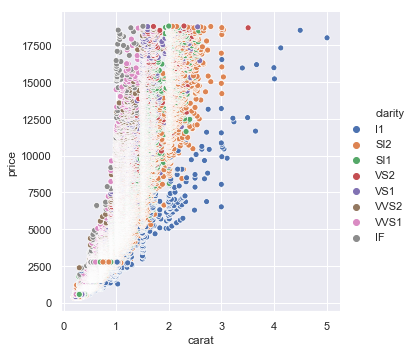

In [2]:
sns.relplot(x='carat',y='price',hue='clarity',data=diamonds)

I'm pretty unhappy with the white circles that are plotted afterwards and dominate; I don't consider this an acceptable result.

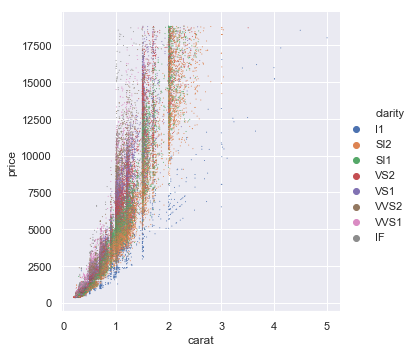

In [3]:
# Figuring out hwo to remove this white border required reading the source.  References online
# all referred to markeredgewidth, but that is not available here; only the color can be controlled.
# https://github.com/mwaskom/seaborn/blob/master/seaborn/relational.py#L886

# Also note that to set a _fixed_ size instead of a mapping to an attribute, I do it with "s", which
# I have to look up from the underlying plot.
sns.relplot(x='carat',y='price',hue='clarity',data=diamonds,edgecolor='',s=1)

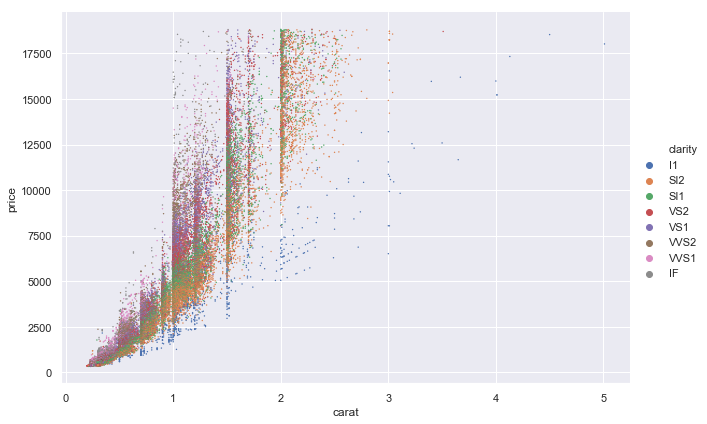

In [4]:
# Now suppose I'd like it to be bigger and wider.  Forget anything you saw online about setting matplotlib figure size.
# You need "height" and "aspect" on relplot().
sns.relplot(x='carat',y='price',hue='clarity',data=diamonds,edgecolor='',height=6,aspect=1.5,s=2)

Overall I consider this result acceptable, but I am not pleased with how painful it was to find the required settings.

## Faceted Scatterplot

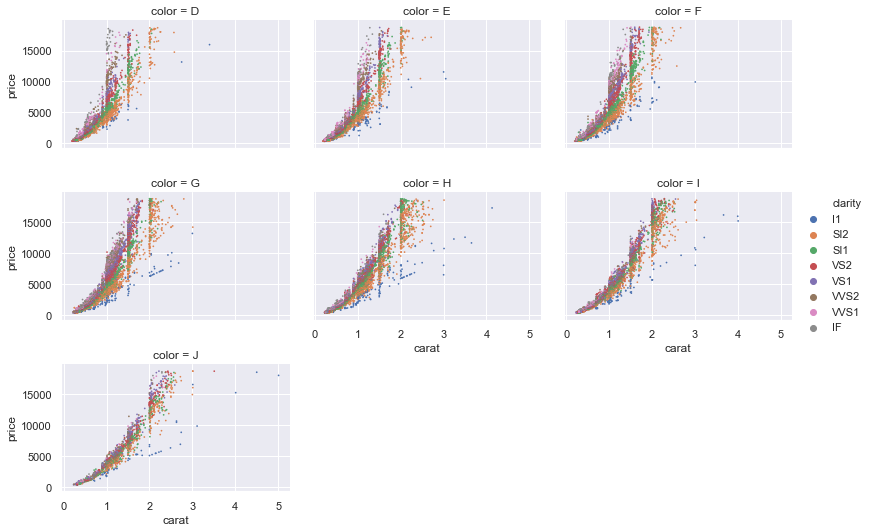

In [5]:
# Note that the size refers to _each facet_ here, not the total.
sns.relplot(x='carat',y='price',hue='clarity',data=diamonds,edgecolor='',height=2.5,aspect=1.5,s=3,col='color',col_wrap=3)

## Basic Line Graph

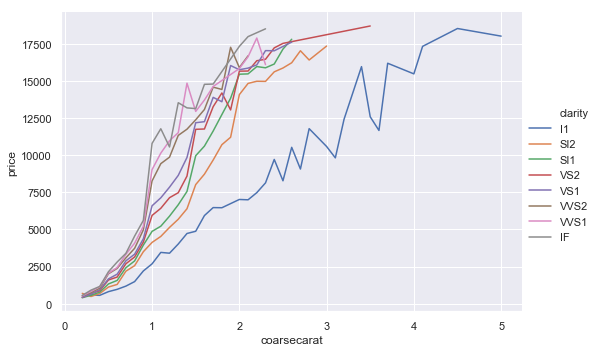

In [6]:
d=diamonds.copy()
d['coarsecarat']=d['carat'].round(1)
# relplot apparently can't see index columns, so take them back out with reset_index
d=d.groupby(['coarsecarat','clarity']).aggregate({'price':np.mean}).reset_index()
sns.relplot(x='coarsecarat',y='price',hue='clarity', data=d,kind='line',aspect=1.5)

## Log Scale 

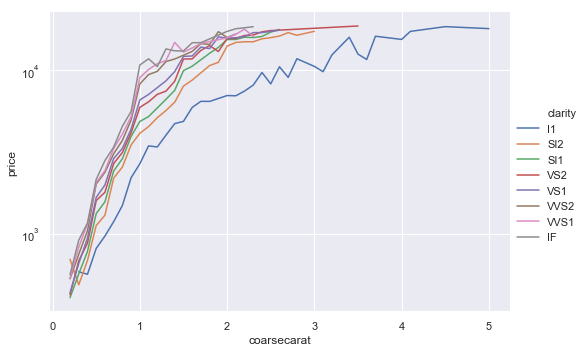

In [7]:
fgrid = sns.relplot(x='coarsecarat',y='price',hue='clarity', data=d,kind='line',aspect=1.5)
fgrid.set(yscale='log')

## Heatmap (MARGINAL)

Bizarrely, Seaborn doesn't seem to offer a normal heatmap with rectangular grids.  I can either get a kernel density estimate (which takes a ridiculous amount of time to draw), or _hexagonal_ bins.  I also can't find a good way to change the scale to log counts.

On the plus side, the univariate histograms are a nice touch.

The sns.heatmap() function can clearly do what I want, but it requires an ndarray for intput.

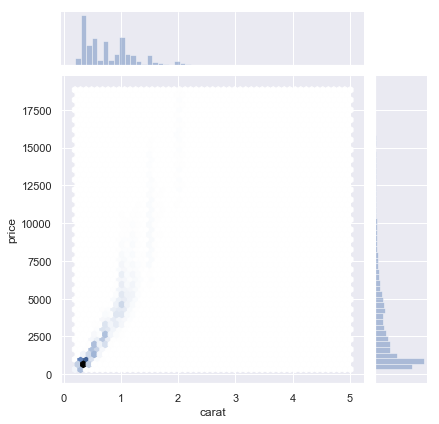

In [8]:
sns.jointplot(x='carat',y='price',data=diamonds,kind='hex')

In [9]:
# Not run - takes too long
#sns.jointplot(x='carat',y='price',data=diamonds,kind='kde')

# One Continuous Dimension

## Histogram

There is no "figure-level" function for making a single histogram, so we have to go lower-level here.  This result is mostly OK, although I can't figure out how to make the bins any darker.

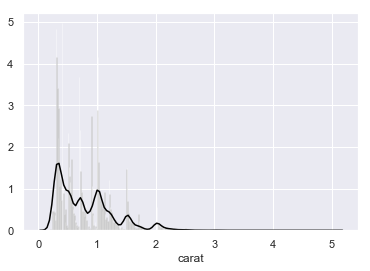

In [10]:
sns.distplot(diamonds['carat'],bins=np.arange(0,3,.01),color='black')

# Two Discrete Dimensions

## Side-by-Side Bar Chart

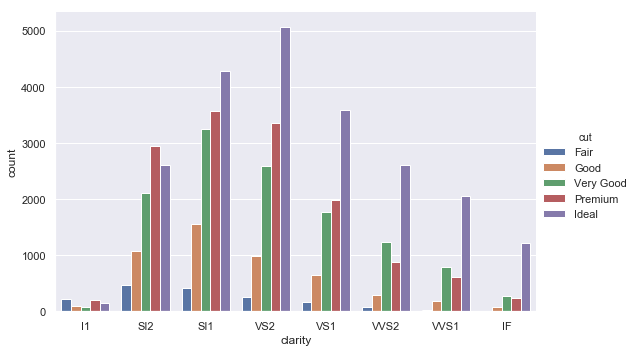

In [11]:
sns.catplot(x='clarity',hue='cut',kind='count',data=diamonds,aspect=1.5)

## Stacked Bar Chart (FAIL)

OK, but I'd like them stacked; can I do that?  It looks like the answer is "no" - making a stacked bar chart in seaborn requires a lot of low-level proramming: https://randyzwitch.com/creating-stacked-bar-chart-seaborn/  

20 lines of code to make a stacked bar chart is not acceptable

# One Discrete, One Continuous

## Boxplot

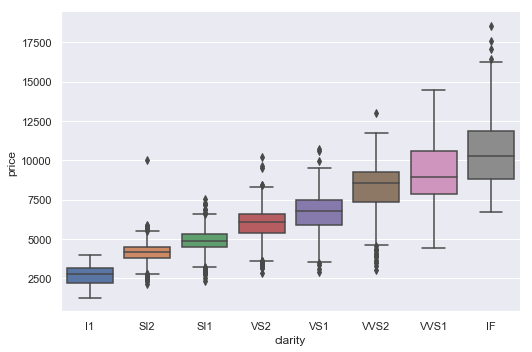

In [12]:
d=diamonds.query('carat >= 0.95 & carat <= 1.05').copy()
sns.catplot(x='clarity',y='price',kind='box',data=d, aspect=1.5)

I didn't ask for color.  It looks OK, but supposing I really didn't want it, how could I turn that off?  Assigning a constant value to hue doesn't work.  If I create a column containing only constant values, that works, but then I still get the first color, blue.  I can force them to be white or grey, with the caveat that the lines around them appear to be set to the fill color plus some darkness, so if I make the fill white, the border lines are a medium grey instead of black.

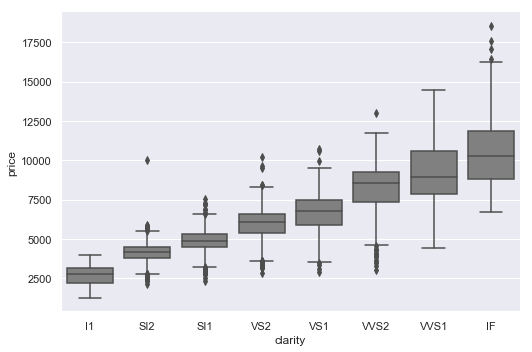

In [13]:
sns.catplot(x='clarity',y='price',kind='box',data=d, aspect=1.5,color='grey')


## Violin Plot (nice)

Text(0.5,0.98,'1 Carat Diamonds')

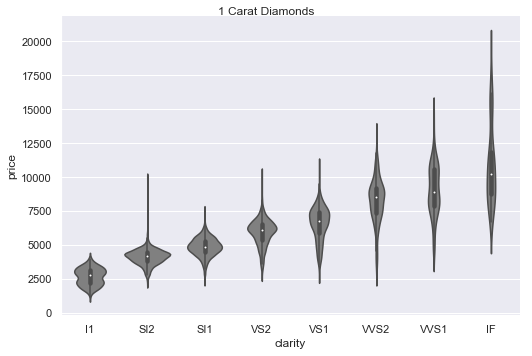

In [14]:
g=sns.catplot(x='clarity',y='price',kind='violin',data=d,aspect=1.5,color='grey')
g.fig.suptitle('1 Carat Diamonds')

That's nice!  I like the extra information that Seaborn puts on its violin plot.  Plus it even has the ability to split the two sides, which is something I've occasionally wanted and ggplot hasn't got.

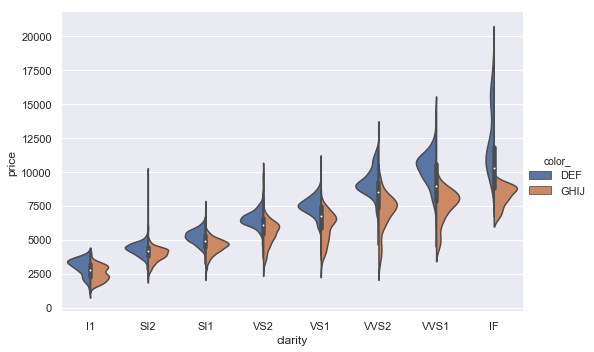

In [15]:
d['color_'] = d.apply(lambda r: 'DEF' if r.loc['color'] in ['D','E','F'] else 'GHIJ',axis=1)
sns.catplot(x='clarity',y='price',kind='violin',hue='color_',data=d,split=True, aspect=1.5)

## Faceted Histogram (MARGINAL)

__TODO__: fix the bar color to something other than white

This works in Seaborn, but it requires a lower-level API than I would have liked.

See https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html#Faceted-histograms

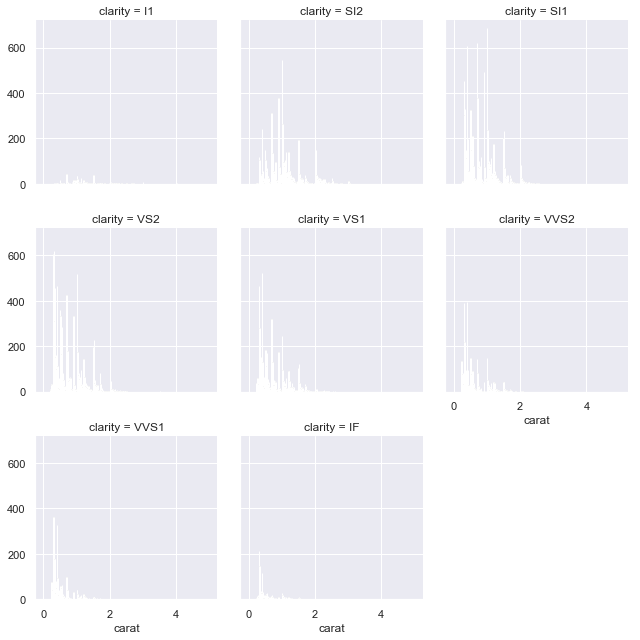

In [16]:
# How do I make the bars not be white?
g = sns.FacetGrid(diamonds, col="clarity",col_wrap=3)
g.map(plt.hist, "carat", bins=np.arange(0,5,.01),color='black')

# More Than Two Variables

## Pair Plot

Not a bad start.  Looks good, but sadly it just ignores all the categorical variables:

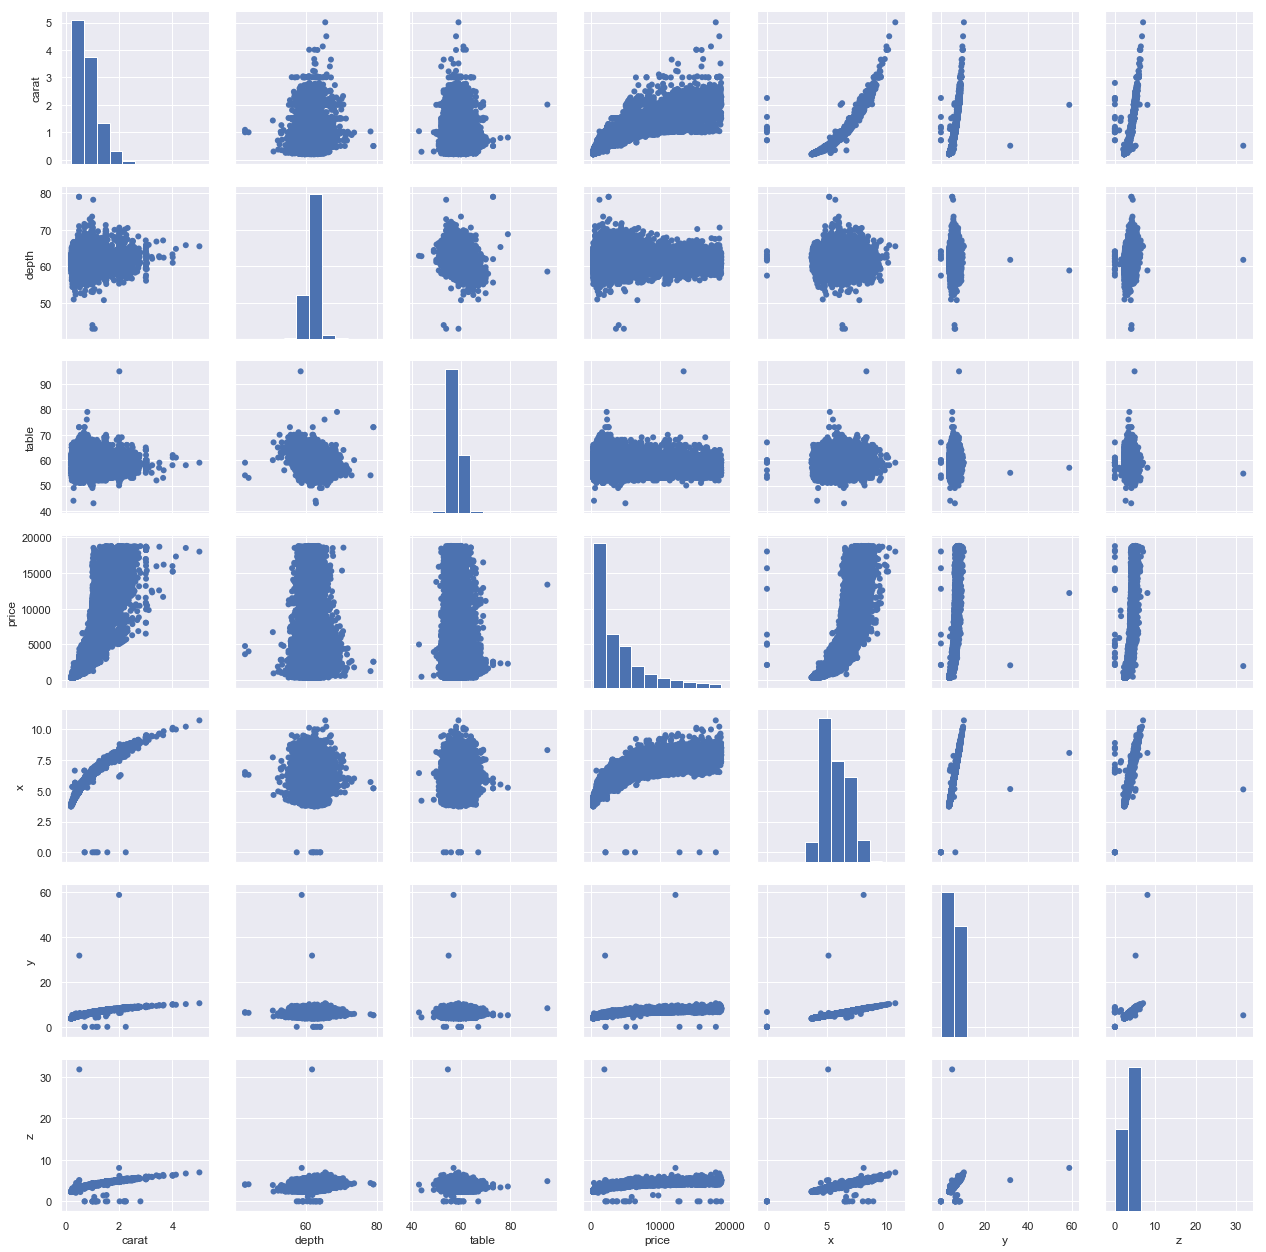

In [17]:
sns.pairplot(diamonds, plot_kws=dict(edgecolor=''))